In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
from glob import glob

directory = '../modified_data/'
files = glob(directory + "*.txt")
print(f"{len(files)} files found")

21 files found


In [56]:
# on va d'abord travailler sur le fichier suivant
files[0].split("/")[-1]
# le fichier ne contient qu'une seule ligne

'raw-22-06-11_modified.txt'

In [57]:
dictionaries = []
for file in files:
    with open(file, 'r', encoding="utf-8") as f:
        for line in f:
            dictionaries.extend(line.split("$"))
dictionaries

['{"empty_slots":9,"address":"6 Place de Jaude","last_updated":1654941825,"uid":"59","free_bikes":12,"id":"03cf89c71748f08a86fd6447a571c963","latitude":45.777457,"longitude":3.08131,"name":"01 - Jaude","timestamp":"2022-06-11T10:04:16.404000Z"}',
 '{"empty_slots":10,"address":"46 Avenue de l\'Union Sovi\\u00e9tique","last_updated":1654941784,"uid":"2","free_bikes":30,"id":"93176cd315c34a1efb632229f0654214","latitude":45.77922,"longitude":3.100944,"name":"02 - Parvis de la gare","timestamp":"2022-06-11T10:04:16.397000Z"}',
 '{"empty_slots":10,"address":"1er Mai","last_updated":1654941557,"uid":"13","free_bikes":14,"id":"51ae212f036977c37600a16d36036e83","latitude":45.787376,"longitude":3.099456,"name":"13 - 1er mai","timestamp":"2022-06-11T10:04:16.407000Z"}',
 '{"empty_slots":12,"address":"1 Rue Pierre Besset","last_updated":1654941714,"uid":"16","free_bikes":4,"id":"6262479ac28335a43c0506580389cc98","latitude":45.781105,"longitude":3.075984,"name":"16 - Fontgi\\u00e8ve","timestamp":"2

In [58]:
import json


data = pd.DataFrame()
for dictionary in dictionaries:
    # convert to correct format
    dictionary = dictionary.replace('":', '":[')
    dictionary = dictionary.replace(',', '],')
    dictionary = dictionary.replace('}', ']}')
    # convert string to dictionnary
    dictionary = json.loads(dictionary)
    # add the dictionary to dataframe
    data = data.append(pd.DataFrame.from_dict(dictionary), ignore_index=True)

/usr/lib/python3/dist-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [59]:
print(f"nombre de lignes dans le dataframe : {len(data)}")


nombre de lignes dans le dataframe : 1234


In [60]:
# visualiser seulement les premières lignes du dataframe
data.head()

address  empty_slots  free_bikes  \
0                 6 Place de Jaude            9          12   
1  46 Avenue de l'Union Soviétique           10          30   
2                          1er Mai           10          14   
3              1 Rue Pierre Besset           12           4   
4            59 Avenue Jean Jaurès           13           0   

                                 id  last_updated   latitude  longitude  \
0  03cf89c71748f08a86fd6447a571c963    1654941825  45.777457   3.081310   
1  93176cd315c34a1efb632229f0654214    1654941784  45.779220   3.100944   
2  51ae212f036977c37600a16d36036e83    1654941557  45.787376   3.099456   
3  6262479ac28335a43c0506580389cc98    1654941714  45.781105   3.075984   
4  a7e26a7cf1a58cda082b5d66cd7c7766    1654941612  45.770958   3.073871   

                     name payment-terminal                    timestamp uid  
0              01 - Jaude              NaN  2022-06-11T10:04:16.404000Z  59  
1  02 - Parvis de la gare              NaN  2022-06-11T10:04:16.397000Z   2  
2            13 - 1er mai              NaN  2022-06-11T10:04:16.407000Z  13  
3          16 - Fontgiève              NaN  2022-06-11T10:04:16.410000Z  16  
4             22 - Jaurès              NaN  2022-06-11T10:04:16.388000Z  22

Rq : uid semble être l'id de la station sur les 59 de Clermont.

In [61]:
# on ne garde que les colonnes qui nous intéressent
data = data[['empty_slots', 'address', 'uid', 'free_bikes', 'timestamp']]
data.head()

empty_slots                          address uid  free_bikes  \
0            9                 6 Place de Jaude  59          12   
1           10  46 Avenue de l'Union Soviétique   2          30   
2           10                          1er Mai  13          14   
3           12              1 Rue Pierre Besset  16           4   
4           13            59 Avenue Jean Jaurès  22           0   

                     timestamp  
0  2022-06-11T10:04:16.404000Z  
1  2022-06-11T10:04:16.397000Z  
2  2022-06-11T10:04:16.407000Z  
3  2022-06-11T10:04:16.410000Z  
4  2022-06-11T10:04:16.388000Z

In [62]:
np.unique(data['timestamp'])

array(['2022-06-10T21:53:39.218000Z', '2022-06-10T21:53:39.220000Z',
       '2022-06-10T21:53:39.222000Z', '2022-06-10T21:53:39.223000Z',
       '2022-06-10T21:53:39.224000Z', '2022-06-10T21:53:39.225000Z',
       '2022-06-10T21:53:39.226000Z', '2022-06-10T21:53:39.227000Z',
       '2022-06-10T21:53:39.228000Z', '2022-06-10T21:53:39.229000Z',
       '2022-06-10T21:53:39.230000Z', '2022-06-10T21:53:39.231000Z',
       '2022-06-10T21:53:39.232000Z', '2022-06-10T21:53:39.233000Z',
       '2022-06-10T21:53:39.234000Z', '2022-06-10T21:53:39.235000Z',
       '2022-06-10T21:53:39.236000Z', '2022-06-10T21:53:39.237000Z',
       '2022-06-10T21:53:39.238000Z', '2022-06-10T21:53:39.239000Z',
       '2022-06-10T21:53:39.240000Z', '2022-06-10T21:53:39.241000Z',
       '2022-06-10T21:53:39.242000Z', '2022-06-10T21:53:39.243000Z',
       '2022-06-10T21:53:39.244000Z', '2022-06-10T21:53:39.245000Z',
       '2022-06-10T21:53:39.246000Z', '2022-06-10T21:53:39.247000Z',
       '2022-06-10T21:53:39.248000

In [63]:
# interpréter timestamp comme une date et passer en time series
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.set_index('timestamp')
# pd.to_datetime(data['timestamp'])
data.head()

empty_slots                          address uid  \
timestamp                                                                   
2022-06-11 10:04:16.404            9                 6 Place de Jaude  59   
2022-06-11 10:04:16.397           10  46 Avenue de l'Union Soviétique   2   
2022-06-11 10:04:16.407           10                          1er Mai  13   
2022-06-11 10:04:16.410           12              1 Rue Pierre Besset  16   
2022-06-11 10:04:16.388           13            59 Avenue Jean Jaurès  22   

                         free_bikes  
timestamp                            
2022-06-11 10:04:16.404          12  
2022-06-11 10:04:16.397          30  
2022-06-11 10:04:16.407          14  
2022-06-11 10:04:16.410           4  
2022-06-11 10:04:16.388           0

In [85]:
mask = data['uid']=='59'
data2 = data[mask]
data2.head()

AttributeError: 'Series' object has no attribute 'uid'

Text(0, 0.5, 'empty_slots')

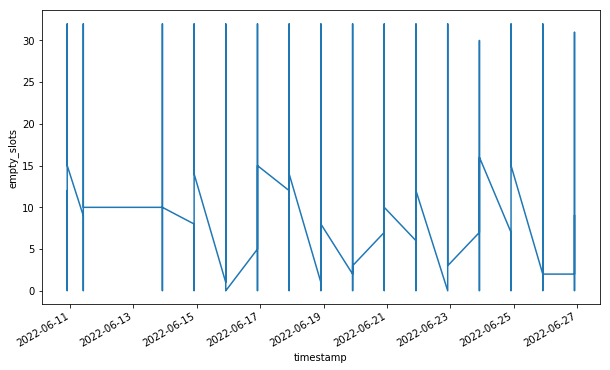

In [71]:
data['2022-06-10':'2022-06-26'][['empty_slots']['uid'==59]].plot(figsize=(10,6))
plt.ylabel('empty_slots')


Text(0, 0.5, 'free_bikes')

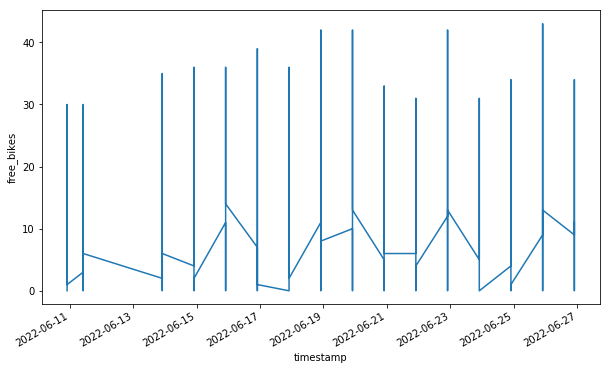

In [65]:
data['2022-06-10':'2022-06-26']['free_bikes'].plot(figsize=(10,6))
plt.ylabel('free_bikes')